<a href="https://colab.research.google.com/github/ArseneGiriteka/PyTorch_Deep_Learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another there can be multiple things as the options).

  ## 1. Make classification data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of x: {x[:5]}")
print(f"First 5 samples of Y: {y[:5]}")

First 5 samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y: [1 1 1 1 0]


In [ ]:
# Make a dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": x[:, 0], "X2": x[:, 1], "label": y})

circles.head(20)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


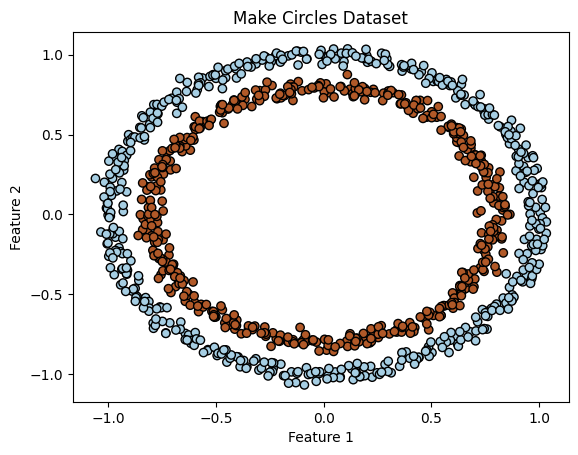

In [ ]:
import matplotlib.pyplot as plt

# Plot the circles
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Make Circles Dataset")
plt.show()

 **Note**: The data we ara working with is often reffered to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Checking input and output shapes

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first expamle of features and labels
x_sample = x[0]
y_sample = y[0]

print(f"Values for onr sample of x: {x_sample} and the same for y: {y_sample}")
print(f"Shapes for onr sample of x: {x_sample.shape} and the same for y: {y_sample.shape}")

Values for onr sample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for onr sample of x: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(x).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), type(Y), X.dtype, Y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and an optimizer
4. Create a training and test loop

In [ ]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`).
2. Creates 2 `nn.Linear()` layers that are cable of handling the shapes of our data.
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model.
4. Instatiate an instance of our model class and send it to target `device`.

In [ ]:
# 1. Make a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self, *args, **kwargs) -> None:
    super().__init__(*args, **kwargs)

    # 2. Create two nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and output 5
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features and output only 1 feature

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x) -> int:
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 ===> output

# 4. Let's instatiate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device, next(model_0.parameters()).device

('cpu', device(type='cpu'))

In [ ]:
# Let's replicate model_0 just above
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.4938, -0.0527],
                      [-0.5627, -0.4131],
                      [-0.6477,  0.4675],
                      [-0.6362,  0.4259],
                      [ 0.4289,  0.3120]])),
             ('0.bias', tensor([ 0.4408,  0.6216, -0.0798,  0.5348, -0.4818])),
             ('1.weight',
              tensor([[-0.2507, -0.3013, -0.0636, -0.3504, -0.0528]])),
             ('1.bias', tensor([0.0021]))])

In [ ]:
# Let's make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 20 predictions:\n{untrained_preds[:20]}")
print(f"\nFirst 20  labels:\n{Y_test[:20]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 20 predictions:
tensor([[-0.6926],
        [-0.4998],
        [-0.8102],
        [-0.6609],
        [-0.1944],
        [-0.0814],
        [-0.0265],
        [ 0.0730],
        [-0.8360],
        [-0.4800],
        [-0.7495],
        [-0.6104],
        [ 0.0451],
        [-0.7320],
        [-0.9258],
        [-0.0371],
        [-0.2866],
        [-0.8594],
        [-0.7925],
        [-0.9248]])

First 20  labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

- For Example for regression you might want MAE or MSE (mean absolute error or mean squared error).

- For classification you might want to use cross entropy or categorical cross entropy(cross entropy)

- For the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`.

- `nn.BCELoss()` requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
- `nn.BCEWithLogitsLoss()` has a built-in sigmoid activation function

In [ ]:
# Let's setup the loss function
loss_func = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Let's calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_func(Y_true, Y_pred):
  return torch.eq(Y_true, Y_pred).sum().item() / len(Y_pred) * 100

## 3. Train the model

To train our model, we're going to need to build a traing loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero gradient
4. Loss backword (backpropagation)
5. Optimizer step

### 3.1 Going from raw logits -> predictrion probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.6926],
        [-0.4998],
        [-0.8102],
        [-0.6609],
        [-0.1944]])

In [ ]:
# Let's use a sigmod function on our model logits to turn them into prediction probabilities
Y_pred_probs = torch.sigmoid(y_logits)
Y_pred_probs

tensor([[0.3334],
        [0.3776],
        [0.3078],
        [0.3405],
        [0.4516]])

For our prediction probability values, we need to perform a range-style rounding on them:

- `Y_pred_probs` >= 0.5, `y=1` (class 1).
- `Y_pred_probs` < 0.5, `y=0` (class 0).

In [ ]:
# Find the predicticted labels
Y_preds = torch.round(Y_pred_probs)

# All step shown in one()
Y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equity
print(torch.eq(Y_preds.squeeze(), Y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


### 3.2 Build a training model


In [ ]:
# Setting the number of epocs
epochs = 100


# Put data to device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


# Build training and evaluation loop
for epoc in range(epochs):
  ### Traing
  model_0.train()

  # 1. Forward pass
  Y_logits = model_0(X_train).squeeze()
  Y_preds = torch.round(torch.sigmoid(Y_logits))

  # 2. Calculate loss/accuracy
  loss = loss_func(Y_logits, Y_train)

  acc = accuracy_func(Y_true=Y_train, Y_pred=Y_preds)


  # 3. Optimizer zero grad
  optimizer.zero_grad()


  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate loss/accuracy
    test_loss = loss_func(test_logits, Y_test)
    test_acc = accuracy_func(Y_true=Y_test, Y_pred=test_preds)

SyntaxError: incomplete input (<ipython-input-25-c41f19ddddf2>, line 11)